<a href="https://colab.research.google.com/github/DenShum/Statistics-in-Python/blob/main/pal_8_Denis_Shum_dz2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком).
Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('/content/2015.csv')
print(df.shape)
df.info()


(158, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memor

In [ ]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.0,46.0,1.0,40.0,80.0,119.0,158.0
Happiness Score,158.0,5.0,1.0,3.0,5.0,5.0,6.0,8.0
Standard Error,158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Economy (GDP per Capita),158.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0
Family,158.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Health (Life Expectancy),158.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Freedom,158.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Trust (Government Corruption),158.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Generosity,158.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Dystopia Residual,158.0,2.0,1.0,0.0,2.0,2.0,2.0,4.0


In [ ]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
# Анализ регионов (10 регионов).Группировка по региону, нахождение среднего и сортировка по оценке
# счастья, по убыванию
df_region = df.groupby('Region').mean().sort_values('Happiness Score',ascending=False)
df_region2 = df_region.groupby('Region').mean().reset_index()
df_region2.head(10)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
1,Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
2,Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
3,Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
4,Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
5,North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
6,Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
7,Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
8,Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980
9,Western Europe,29.523810,6.689619,0.037625,1.298596,1.247302,0.909148,0.549926,0.231463,0.302109,2.151185


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

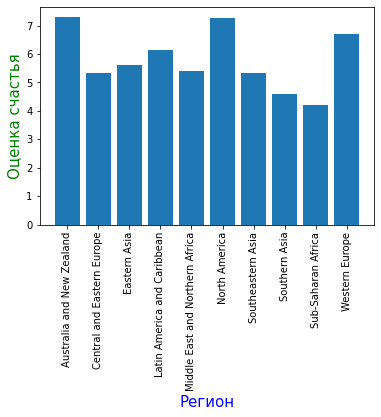

In [ ]:
# Три самых счастливых региона по "Оценке счастья":Australia and New Zealand, North America и Western Europe
# Самые несчастные регионы - Sub-Saharan Africa и Southern Asia
plt.bar(df_region2["Region"],df_region2['Happiness Score'])
plt.ylabel("Оценка счастья", fontsize=15,color="Green")
plt.xlabel("Регион", fontsize=15,color="Blue")
plt.xticks(rotation=90)

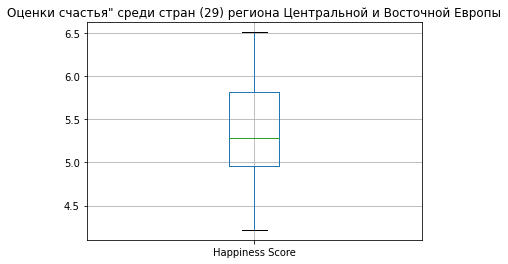

In [ ]:
# Основные статистические показател "Оценки счастья" среди стран (29) региона Центральной и Восточной Европы
# Среди стран региона показатели отличаются не сильно
df_Centr = df[(df['Region']=='Central and Eastern Europe')]
df_Centr['Happiness Score'].plot(kind = 'box',title='Оценки счастья" среди стран (29) региона Центральной и Восточной Европы',grid=True)


In [ ]:
# Количество стран региона Центральной и Восточной Европы
len(df_Centr.value_counts())

29

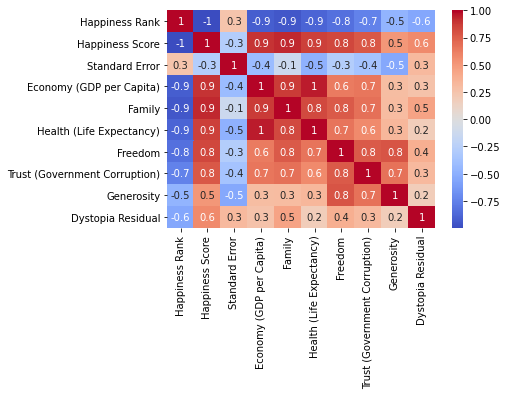

In [ ]:
# Корреляция критериев оценки(Семья имеет наибольшую корреляцию с "экономикой")
sns.heatmap(df_region2.corr(), annot = True,fmt='.1g',cmap= 'coolwarm')

Text(0.5, 0, 'Country')

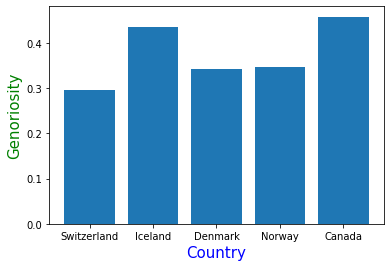

In [ ]:
# Создание гистограммы для 5 лучших стран рейтинга по щедрости
# Щедрость не прямо пропорционально рейтингу счастья(оценки счастья)
plt.bar(df.head(5)['Country'],df.head(5)['Generosity'])
plt.ylabel('Genoriosity', fontsize=15,color='Green')
plt.xlabel("Country", fontsize=15,color="Blue")


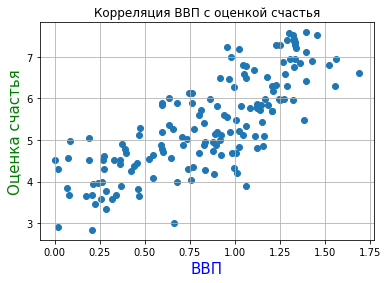

In [ ]:
plt.scatter(df["Economy (GDP per Capita)"],df['Happiness Score'])
plt.title ('Корреляция ВВП с оценкой счастья')
plt.ylabel("Оценка счастья", fontsize=15,color="Green")
plt.xlabel("ВВП", fontsize=15,color="Blue")
plt.grid()